In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [296]:
elevation = np.full(200, 0.7)#+np.random.rand(200)/2
first = 3*np.sin(np.arange(0,20,0.1)/6.28)
second = 3*np.sin(np.arange(0,20,0.1)/6.28)+0.5
third = 3*np.sin(np.arange(0,20,0.1)/6.28)+0.65

first = np.where(first > elevation, elevation, first)
second = np.where(second > elevation, elevation, second)
third = np.where(third > elevation, elevation, third)


<IPython.core.display.Javascript object>


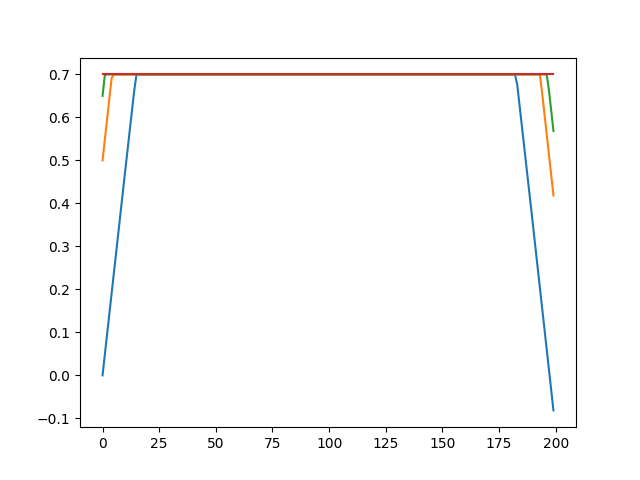

In [297]:
plt.plot(first)
plt.plot(second)
plt.plot(third)
plt.plot(elevation)


In [271]:
df =  pd.DataFrame()
df['elevation'] = elevation
df['third']=third
df['second'] = second
df['first'] = first

In [298]:
angular_thicknesses = df.T.diff(axis=0).abs().T

In [299]:
angular_thicknesses['class'] = 0

In [300]:
onlap_first = np.where(3*np.sin(np.arange(0,20,0.1)/6.28) > elevation, elevation, 3*np.sin(np.arange(0,20,0.1)/6.28))
onlap_second = np.where(np.where(np.full(200,0.5) > onlap_first, np.full(200,0.5), onlap_first) > elevation, elevation, np.where(np.full(200,0.5) > onlap_first, np.full(200,0.5), onlap_first))
onlap_third = np.where(np.where(np.full(200,0.65) > onlap_first, np.full(200,0.65), onlap_first) > elevation, elevation, np.where(np.full(200,0.65) > onlap_first, np.full(200,0.65), onlap_first))

<IPython.core.display.Javascript object>


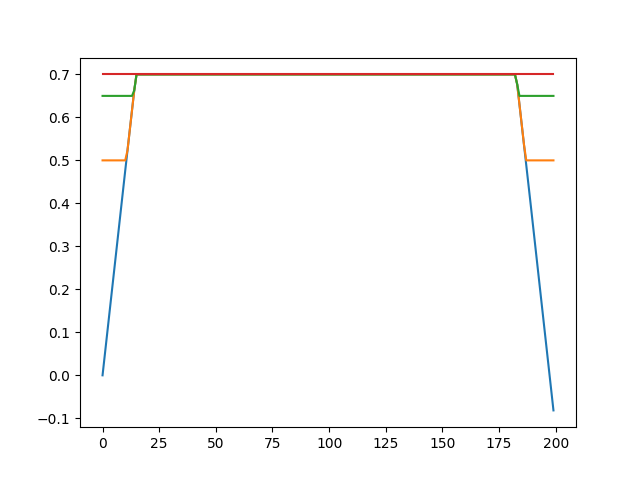

In [301]:
plt.plot(onlap_first)
plt.plot(onlap_second)
plt.plot(onlap_third)
plt.plot(elevation)

In [302]:
dfo =  pd.DataFrame()
dfo['elevation'] = elevation
dfo['third']=onlap_third
dfo['second'] = onlap_second
dfo['first'] = onlap_first

In [303]:
onlap_thicknesses = dfo.T.diff(axis=0).abs().T

In [304]:
normalized_df=(angular_thicknesses-angular_thicknesses.min())/(angular_thicknesses.max()-angular_thicknesses.min())
normalized_dfo=(onlap_thicknesses-onlap_thicknesses.min())/(onlap_thicknesses.max()-onlap_thicknesses.min())
normalized_dfo['class'] = 1
normalized_df['class'] = 0

In [306]:
dataset = pd.concat((normalized_df, normalized_dfo))

In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[0:,1:4].values, dataset.iloc[0:,4].values, test_size=0.5, random_state=86)

In [308]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [317]:
def create_model():
    model = Sequential()
    model.add(Dense(5, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.9))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [318]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [319]:
np.random.seed(86)

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [314]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
200/200 [==============================] - 2s 8ms/step - loss: 0.6932 - acc: 0.4850
Epoch 2/200
200/200 [==============================] - 0s 85us/step - loss: 0.6931 - acc: 0.5150
Epoch 3/200
200/200 [==============================] - 0s 65us/step - loss: 0.6931 - acc: 0.5150
Epoch 4/200
200/200 [==============================] - 0s 90us/step - loss: 0.6931 - acc: 0.5150
Epoch 5/200
200/200 [==============================] - 0s 50us/step - loss: 0.6931 - acc: 0.5150
Epoch 6/200
200/200 [==============================] - 0s 50us/step - loss: 0.6931 - acc: 0.5150
Epoch 7/200
200/200 [==============================] - 0s 50us/step - loss: 0.6931 - acc: 0.5150
Epoch 8/200
200/200 [==============================] - 0s 50us/step - loss: 0.6931 - acc: 0.5150
Epoch 9/200
200/200 [==============================] - 0s 55us/step - loss: 0.6931 - acc: 0.5150
Epoch 10/200
200/200 [==============================] - 0s 50us/step - loss: 0.6931 - acc: 0.5150
Epoch 11/200
200/200 [========

200/200 [==============================] - 0s 40us/step - loss: 0.6892 - acc: 0.5150
Epoch 85/200
200/200 [==============================] - 0s 45us/step - loss: 0.6913 - acc: 0.5150
Epoch 86/200
200/200 [==============================] - 0s 45us/step - loss: 0.6910 - acc: 0.5350
Epoch 87/200
200/200 [==============================] - 0s 40us/step - loss: 0.6907 - acc: 0.5550
Epoch 88/200
200/200 [==============================] - 0s 50us/step - loss: 0.6909 - acc: 0.4750
Epoch 89/200
200/200 [==============================] - 0s 40us/step - loss: 0.6908 - acc: 0.5400
Epoch 90/200
200/200 [==============================] - 0s 50us/step - loss: 0.6892 - acc: 0.4950
Epoch 91/200
200/200 [==============================] - 0s 40us/step - loss: 0.6918 - acc: 0.4800
Epoch 92/200
200/200 [==============================] - 0s 45us/step - loss: 0.6930 - acc: 0.4900
Epoch 93/200
200/200 [==============================] - 0s 40us/step - loss: 0.6901 - acc: 0.5250
Epoch 94/200
200/200 [===========

200/200 [==============================] - 0s 40us/step - loss: 0.6872 - acc: 0.5300
Epoch 168/200
200/200 [==============================] - 0s 50us/step - loss: 0.6852 - acc: 0.5450
Epoch 169/200
200/200 [==============================] - 0s 45us/step - loss: 0.6842 - acc: 0.5450
Epoch 170/200
200/200 [==============================] - 0s 45us/step - loss: 0.6880 - acc: 0.5250
Epoch 171/200
200/200 [==============================] - 0s 45us/step - loss: 0.6879 - acc: 0.5450
Epoch 172/200
200/200 [==============================] - 0s 50us/step - loss: 0.6848 - acc: 0.5300
Epoch 173/200
200/200 [==============================] - 0s 45us/step - loss: 0.6915 - acc: 0.5000
Epoch 174/200
200/200 [==============================] - 0s 50us/step - loss: 0.6866 - acc: 0.5100
Epoch 175/200
200/200 [==============================] - 0s 40us/step - loss: 0.6920 - acc: 0.4950
Epoch 176/200
200/200 [==============================] - 0s 46us/step - loss: 0.6818 - acc: 0.5400
Epoch 177/200
200/200 [=

In [315]:
score=model.evaluate(X_test, y_test)

200/200 [==============================] - 0s 2ms/step


In [316]:
score

[0.6785366749763488, 0.61]